# K-MEANS

In [1]:
! pip install yellowbrick

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import os
os.environ["OMP_NUM_THREADS"] = "1"

# Crime Statistics Clustering Project

## 1. Business Problem

The objective of this project is to segment U.S. states into different clusters based on their crime statistics. By clustering the states according to various crime metrics, law enforcement agencies, policymakers, and researchers can better understand crime patterns and tailor crime prevention strategies for each cluster.

### Task:
The main task is to apply **clustering algorithms** to classify the U.S. states into groups based on their crime statistics, which include **Murder rate**, **Assault rate**, **Urban Population percentage**, and **Rape rate**.

## 2. Dataset Story

The dataset consists of crime statistics for various U.S. states. The variables represent different types of crimes and population-related metrics. The data includes murder and assault rates, the percentage of the urban population, and the rape rate for each state.

### 2.1 Variables:
- **Murder**: The number of murders.
- **Assault**: The number of assaults.
- **UrbanPop**: The percentage of the state's population living in urban areas.
- **Rape**: The number of rapes.

In [2]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**NOT** It is important to standardize the variables when using distance-based and gradient descent-based methods. Here, I will also perform a standardization process.

In [6]:
## Standardization

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [7]:
## Let's examine these observation units. fit_transform transforms them into a numpy array.

df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [8]:
# The process of establishing the model, but there is no dependent variable here.

kmeans = KMeans(n_clusters=4, random_state=17).fit(df)

In [9]:
## Let's look at the hyperparameters in the model.

kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

**n_clusters** is a parameter that can be determined.

In [10]:
# Observation of cluster number

kmeans.n_clusters

4

In [11]:
# Let's look at the centers of the clusters.

kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

These are the standardized centers of the four clusters that were finally determined.

In [12]:
# Specified set of labels..4 labels from 0 to 3.

kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

These are the clusters determined by K means for each observation in the data set.

In [13]:
## Sum of squared distances of samples to their closest center. ssd, sse, ssr 

kmeans.inertia_

3.683456153585914

**# Determining the Optimum Number of Clusters**

In [14]:
## Creating an empty k means object

kmeans = KMeans()

# Creating an empty ssd list

ssd = []

# Creating Ks from 1 to 30

K = range(1, 30)


for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

In [15]:
ssd

[13.184122550256447,
 6.596893867946197,
 5.3342598068602625,
 3.690820410392111,
 3.2557728880989525,
 3.027858565907529,
 2.7307933836555773,
 2.2699587099964367,
 2.2646304852511707,
 2.023548543521919,
 2.0122350985617246,
 1.667635953521029,
 1.5192503961363302,
 1.4712775685192838,
 1.3184396669761194,
 1.3424631423314517,
 1.248003238436154,
 1.0929624714404607,
 1.02444781521262,
 0.9684216758836126,
 0.9480321996981502,
 0.7716217292667313,
 0.7488548663420144,
 0.698420055176311,
 0.6345985231614887,
 0.573446619231118,
 0.49991225475694334,
 0.4349178038913993,
 0.4337139135318261]

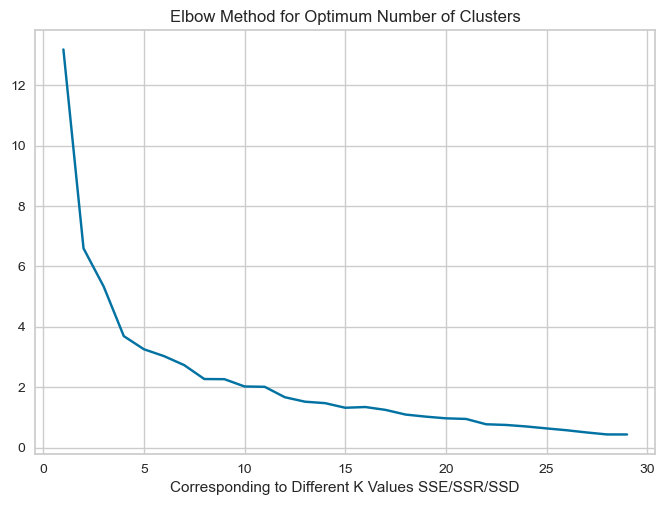

In [16]:
## Let's create a visual to understand these values. Distance residual sums for different K values
# Let's write sse instead of the distance residual sums.

plt.plot(K, ssd, "bx-")
plt.xlabel("Corresponding to Different K Values SSE/SSR/SSD")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

Kume sayisi arttikca SSD,SSE ,SSR degeri dusumus. 10,15 yapilabilir.

**What happens when there are as many clusters as observation units?**  It will be 0 because all observation units will be a cluster. Therefore, we expect the error to decrease as the number of clusters increases.

**ATTENTION** When clustering methods such as the K-Means method and the hierarchical clustering method are used, the operation is not performed by directly looking at the cluster numbers according to SSE, according to the mathematical references given to us by the algorithm. We need to include business information.

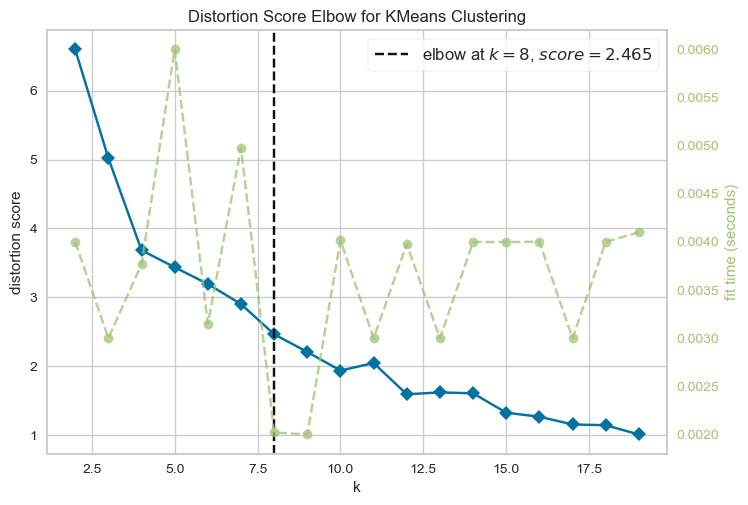

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Automatic determination of optimum cluster number according to Elbow Method.

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [18]:
elbow.elbow_value_

8

**Creating Final Clusters**

In [19]:
# LET'S CREATE OUR MODEL ACCORDING TO ELBOW VALUE

kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [20]:
kmeans.n_clusters

8

In [21]:
kmeans.cluster_centers_

array([[0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.38955823, 0.46347032, 0.67231638, 0.63996555],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.67710843, 0.83082192, 0.60677966, 0.69715762],
       [0.37228916, 0.34041096, 0.49322034, 0.27596899],
       [0.59036145, 0.75      , 0.91525424, 0.93023256],
       [0.58885542, 0.70034247, 0.85169492, 0.5       ]])

In [22]:
kmeans.labels_

array([1, 4, 7, 5, 6, 2, 3, 5, 4, 1, 3, 0, 7, 5, 0, 5, 5, 1, 0, 4, 3, 4,
       0, 1, 2, 5, 5, 6, 0, 3, 4, 7, 1, 0, 3, 5, 2, 3, 3, 1, 0, 1, 7, 3,
       0, 5, 3, 0, 0, 5])

In [23]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [24]:
## Created clusters, but we do not know which state is in which cluster. 

clusters_kmeans = kmeans.labels_

In [25]:
## Let's IMPORT the dataframe from the beginning

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

In [26]:
## Adding a new variable to Dataframe

df["cluster"] = clusters_kmeans

In [27]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,7
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,6


In [28]:
# Convert 0 cluster to 1

df["cluster"] = df["cluster"] + 1

In [29]:
# WHICH STATES ARE IN CLUSTER NUMBER 1?

df[df["cluster"]==1]

,Murder,Assault,UrbanPop,Rape,cluster
Idaho,2.6,120,54,14.2,1
Iowa,2.2,56,57,11.3,1
Maine,2.1,83,51,7.8,1
Minnesota,2.7,72,66,14.9,1
New Hampshire,2.1,57,56,9.5,1
North Dakota,0.8,45,44,7.3,1
South Dakota,3.8,86,45,12.8,1
Vermont,2.2,48,32,11.2,1
West Virginia,5.7,81,39,9.3,1
Wisconsin,2.6,53,66,10.8,1


In [30]:
## IS THE POSITION UNIT IN EACH CLUSTER LOGICAL OR NOT?

df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           10   2.680000   2.40      10   70.100000   64.5       10   
2            7  14.671429  14.40       7  251.285714  249.0        7   
3            3   7.266667   7.90       3  180.333333  178.0        3   
4            9   4.955556   4.40       9  125.444444  120.0        9   
5            5  12.040000  11.40       5  287.600000  285.0        5   
6           10   6.980000   6.70      10  144.400000  133.0       10   
7            2  10.600000  10.60       2  264.000000  264.0        2   
8            4  10.575000  10.75       4  249.500000  251.5        4   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        51.000000   52.5    10  10.910000  11.00  
2        54.285714   58.0     7  21.685714  22.20  
3        71.666667   70.0     3  32.066667  29.30  
4        80.111111   80.0     9  17.788889  18.80  
5        67.800000   70.0     5  34.280000  32.10  
6        61.100000   62.5    10  17.980000  17.25  
7        86.000000   86.0     2  43.300000  43.30  
8        82.250000   81.5     4  26.650000  25.80

In [31]:
## CREATING CSV FILE

df.to_csv("clusters.csv")

# HIERARCHICAL CLUSTER ANALYSIS

In [32]:
df = pd.read_csv("datasets/USArrests.csv", index_col=0)

sc = MinMaxScaler((0, 1))

df = sc.fit_transform(df)

In [33]:
## LINKAGE METHOD--Perform hierarchical /agglomerative clustering

hc_average = linkage(df, "average")

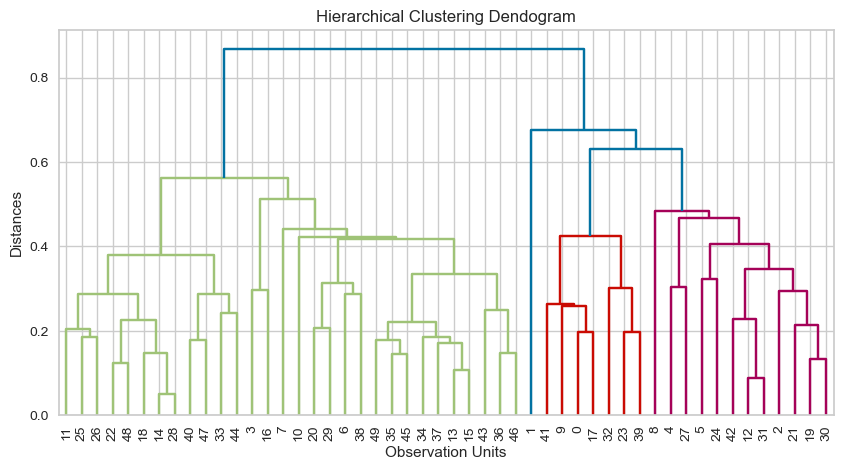

In [44]:
# DENDONGRAM --diagram showing cluster structure

plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

You can decide how many clusters there will be by looking at this diagram.

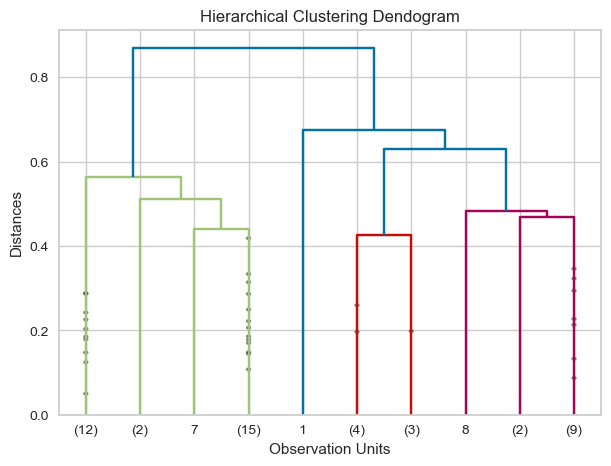

In [45]:
## If we want to adjust the clustering here, for example, let it be 10 clusters or 5 clusters.

# Add arguments  truncate_mode="lastp", p=10

plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

**Determining the Number of Clusters**

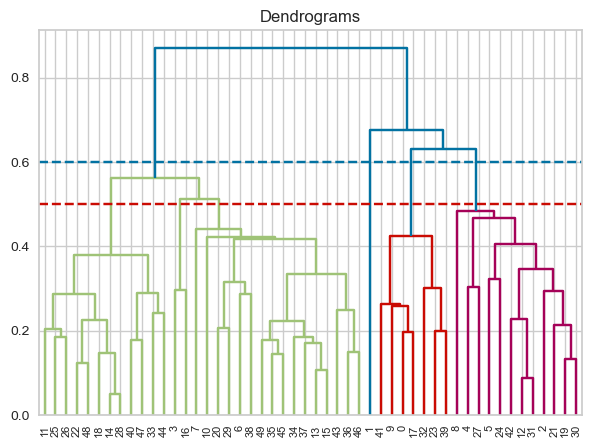

In [36]:
## Is there a way to draw this cluster programmatically?

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

**Creating the Final Model**

In [37]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)

In [38]:
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [39]:
## Let's IMPORT the dataframe and add the clusters numbers into it.

df = pd.read_csv("datasets/USArrests.csv", index_col=0)

df["hi_cluster_no"] = clusters

In [40]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [41]:
## Let's change the cluster number starting from 0

df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [42]:

df["kmeans_cluster_no"] = clusters_kmeans

df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

In [43]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,2
Alaska,10.0,263,48,44.5,3,5
Arizona,8.1,294,80,31.0,2,8
Arkansas,8.8,190,50,19.5,1,6
California,9.0,276,91,40.6,2,7
